In [1]:
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_path = r'D:\WORK\AIML\face emotion\dataset'

train_data_dir = os.path.join(data_path, "train")
validation_data_dir = os.path.join(data_path, "validation")

classes = ['angry', 'sad', 'happy', 'neutral']


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    classes=classes  # Specify the classes
)

# Create validation data generator
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    classes=classes  # Specify the classes
)

Found 10963 images belonging to 4 classes.
Found 5140 images belonging to 4 classes.


In [4]:
# Initialize the model
model = Sequential()

# Add convolutional layers with max pooling
model.add(Conv2D(64, (3, 3), strides=(1, 1), input_shape=(128, 128, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), strides=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
num_classes = len(classes)
model.add(Dense(num_classes, activation='softmax'))  # Adjust output layer units

In [5]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

batch_size = 60

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate for fine-tuning
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                        

In [6]:
# Train the model with fewer steps per epoch and fewer epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Reduce steps per epoch
    epochs=110,  # Reduce the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Reduce validation steps
)

Epoch 1/110
180/182 [============================>.] - ETA: 0s - loss: 2.1061 - accuracy: 0.3271

C:\Users\ASUS\anaconda3\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


182/182 [==============================] - 87s 470ms/step - loss: 2.1056 - accuracy: 0.3287 - val_loss: 2.0392 - val_accuracy: 0.1886
Epoch 2/110
182/182 [==============================] - 96s 530ms/step - loss: 1.8339 - accuracy: 0.3784 - val_loss: 1.9996 - val_accuracy: 0.2305
Epoch 3/110
182/182 [==============================] - 90s 495ms/step - loss: 1.6558 - accuracy: 0.4191 - val_loss: 2.2768 - val_accuracy: 0.2176
Epoch 4/110
182/182 [==============================] - 87s 476ms/step - loss: 1.5390 - accuracy: 0.4420 - val_loss: 2.1743 - val_accuracy: 0.2147
Epoch 5/110
182/182 [==============================] - 90s 495ms/step - loss: 1.4152 - accuracy: 0.4633 - val_loss: 2.2293 - val_accuracy: 0.2397
Epoch 6/110
182/182 [==============================] - 82s 450ms/step - loss: 1.2855 - accuracy: 0.4806 - val_loss: 2.3750 - val_accuracy: 0.2408
Epoch 7/110
182/182 [==============================] - 84s 462ms/step - loss: 1.1839 - accuracy: 0.5092 - val_loss: 2.5496 - val_accurac

Epoch 57/110
182/182 [==============================] - 77s 424ms/step - loss: 0.4586 - accuracy: 0.7885 - val_loss: 3.3564 - val_accuracy: 0.2974
Epoch 58/110
182/182 [==============================] - 78s 427ms/step - loss: 0.4644 - accuracy: 0.7943 - val_loss: 4.0446 - val_accuracy: 0.3169
Epoch 59/110
182/182 [==============================] - 78s 428ms/step - loss: 0.4464 - accuracy: 0.7909 - val_loss: 5.1557 - val_accuracy: 0.2401
Epoch 60/110
182/182 [==============================] - 78s 428ms/step - loss: 0.4210 - accuracy: 0.8037 - val_loss: 4.6787 - val_accuracy: 0.3309
Epoch 61/110
182/182 [==============================] - 77s 421ms/step - loss: 0.4327 - accuracy: 0.8009 - val_loss: 4.8720 - val_accuracy: 0.3386
Epoch 62/110
182/182 [==============================] - 77s 423ms/step - loss: 0.4182 - accuracy: 0.8152 - val_loss: 5.1181 - val_accuracy: 0.3206
Epoch 63/110
182/182 [==============================] - 77s 424ms/step - loss: 0.4164 - accuracy: 0.8142 - val_loss: 4

In [7]:
model.save("face 7 emotion.h5")

1/1 [==============================] - 0s 247ms/step
Frame 1: sad
Frame 2: sad
Frame 3: sad
Frame 4: sad
Frame 5: sad
Frame 6: sad
Frame 7: sad
Frame 8: angry
Frame 9: angry
Frame 10: angry
Frame 11: sad
Frame 12: angry
Frame 13: angry
Frame 14: sad
Frame 15: angry
Frame 16: sad
Frame 17: sad
Frame 18: sad
Frame 19: sad
Frame 20: sad
Frame 21: sad
Frame 22: sad
Frame 23: sad
Frame 24: sad
Frame 25: sad
Frame 26: sad
Frame 27: sad
Frame 28: sad
Frame 29: sad
Frame 1: sad


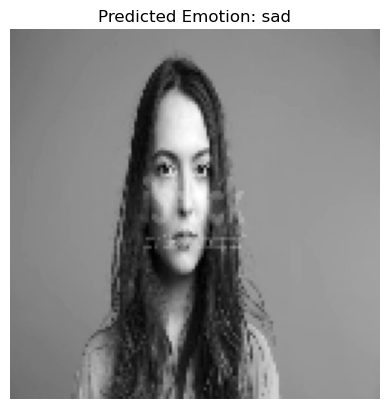

Frame 2: sad


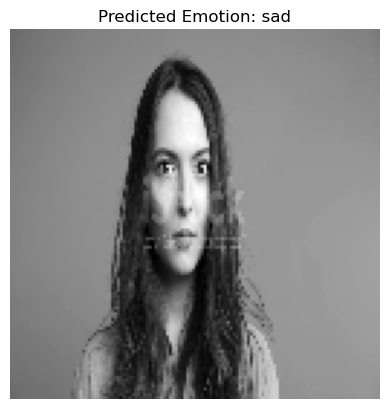

Frame 3: sad


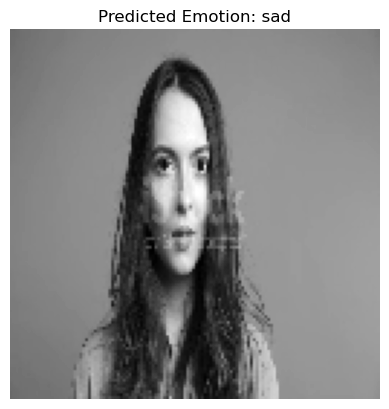

Frame 4: sad


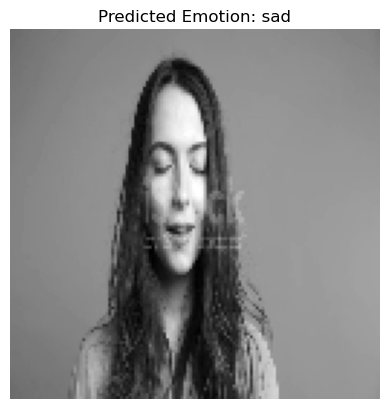

Frame 5: sad


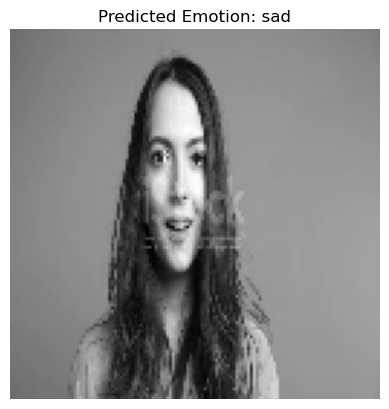

Frame 6: sad


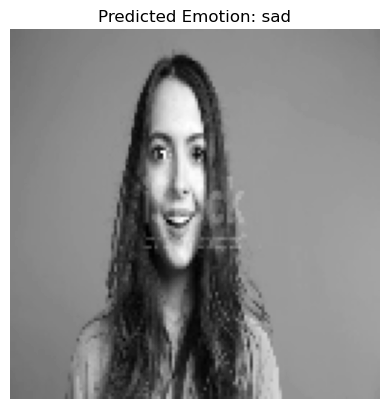

Frame 7: sad


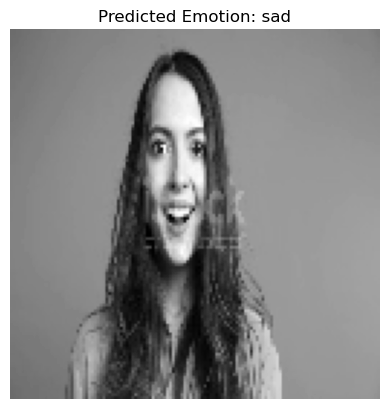

Frame 8: angry


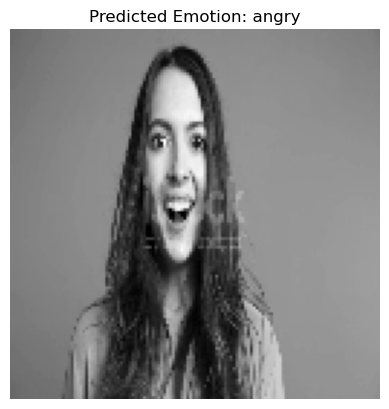

Frame 9: angry


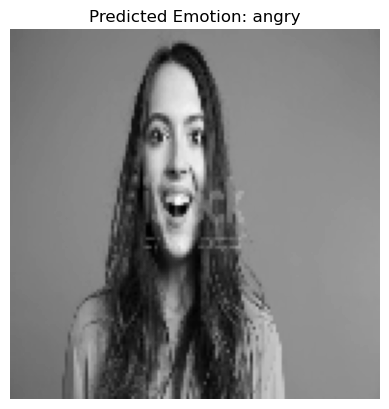

Frame 10: angry


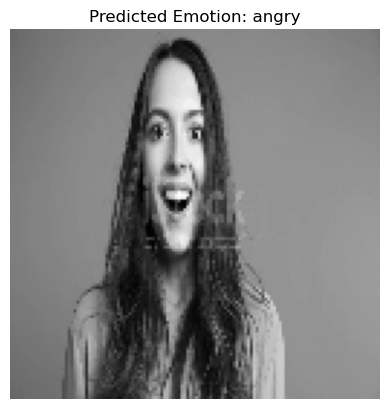

Frame 11: sad


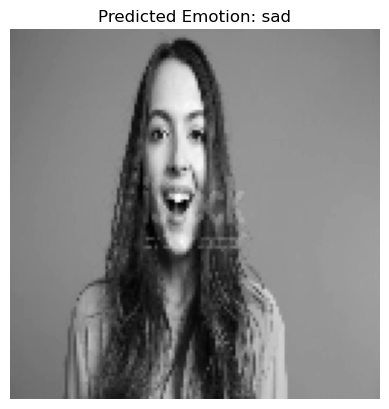

Frame 12: angry


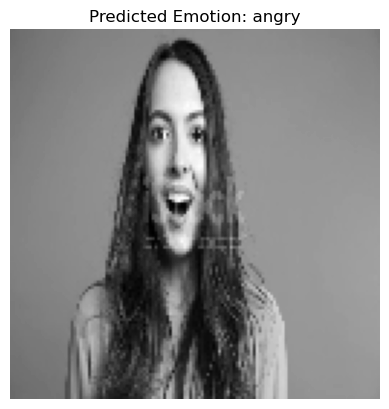

Frame 13: angry


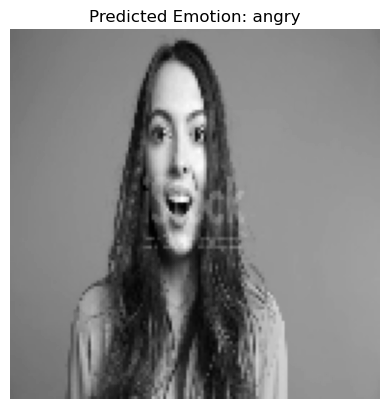

Frame 14: sad


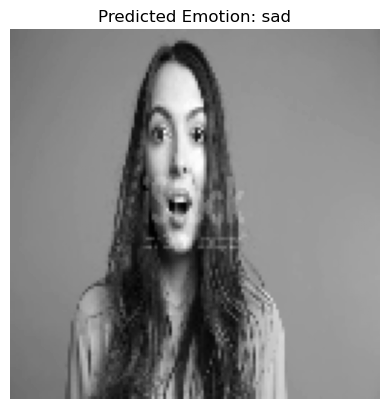

Frame 15: angry


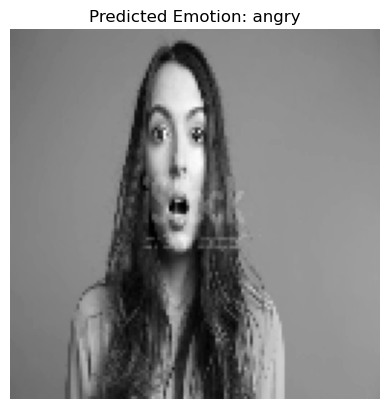

Frame 16: sad


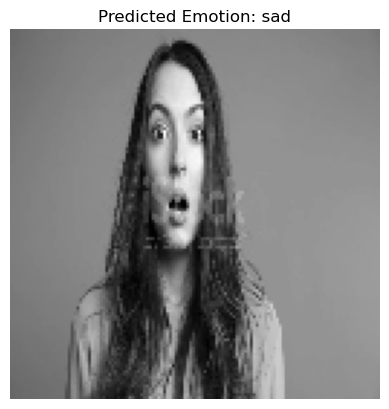

Frame 17: sad


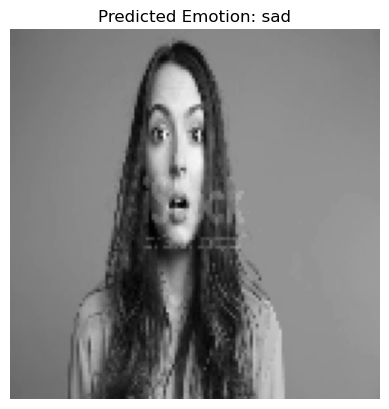

Frame 18: sad


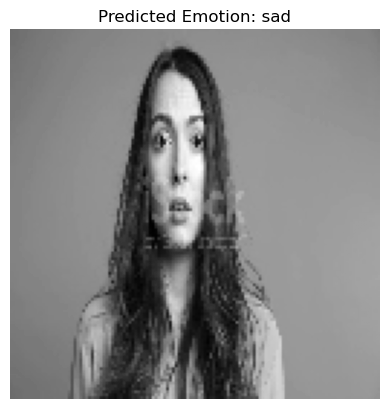

Frame 19: sad


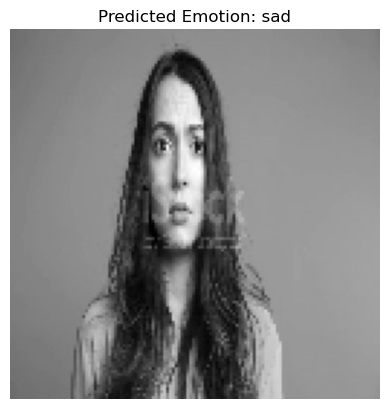

Frame 20: sad


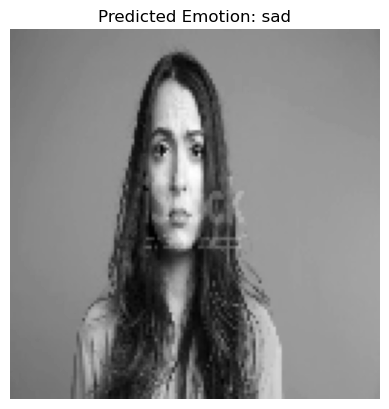

Frame 21: sad


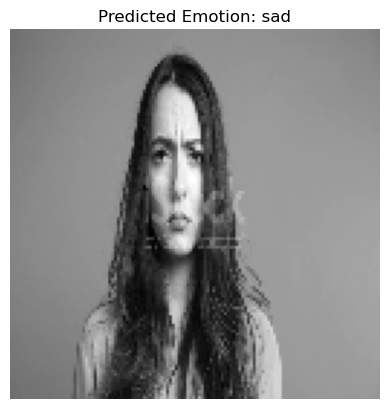

Frame 22: sad


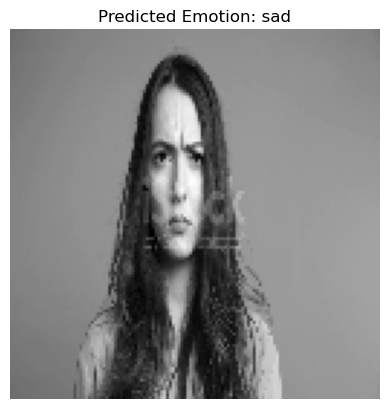

Frame 23: sad


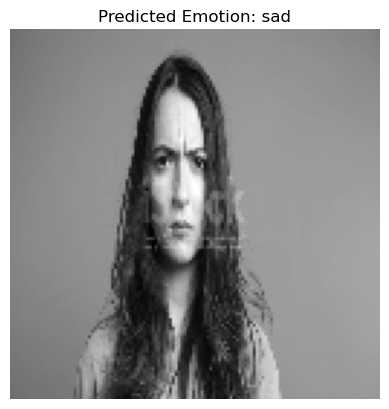

Frame 24: sad


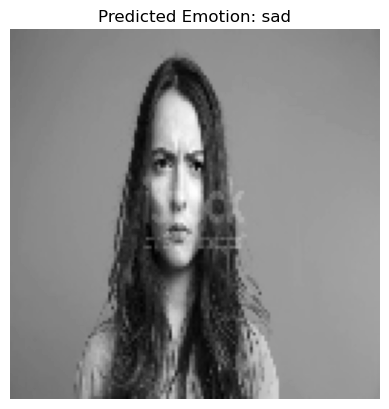

Frame 25: sad


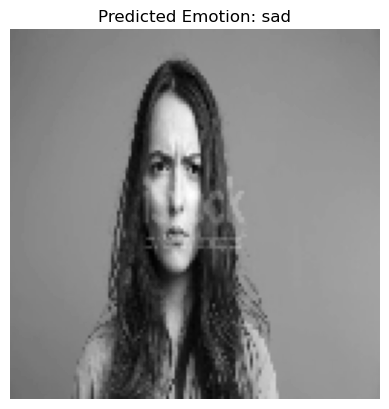

Frame 26: sad


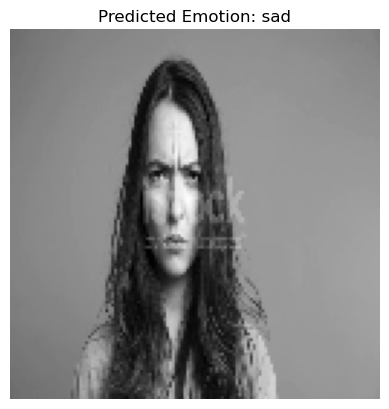

Frame 27: sad


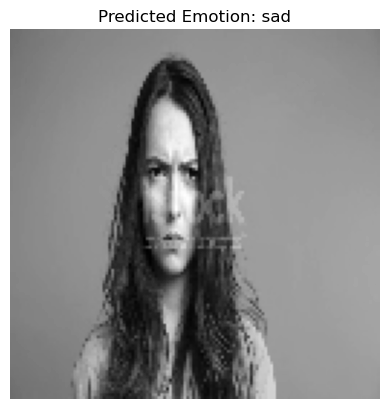

Frame 28: sad


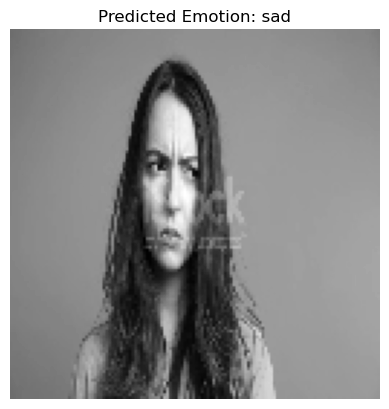

Frame 29: sad


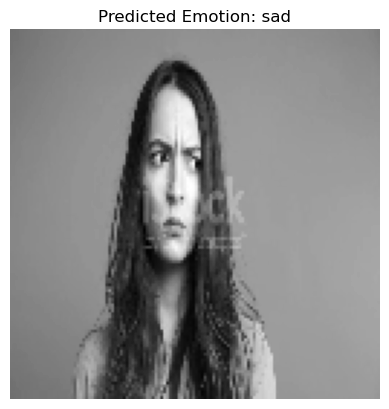

In [18]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Function to process image
def process_image(image_path, target_size=(128, 128)):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError("Failed to load image")
        if img.size == 0:
            raise ValueError("Empty image")
        img_resized = cv2.resize(img, target_size)
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        return [img_gray]
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Function to process video
def process_video(video_path, frames_per_second=3, target_size=(128, 128)):
    try:
        cap = cv2.VideoCapture(video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        duration = frame_count / fps
        frames_list = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            frame_index = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
            if frame_index % int(fps / frames_per_second) == 0:
                frame_resized = cv2.resize(frame, target_size)
                frame_gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)
                frames_list.append(frame_gray)
        cap.release()
        return frames_list
    except Exception as e:
        print(f"Error processing video: {e}")
        return None

# Load the trained model
model_path = r"C:\Users\ASUS\face 4 emotion.h5"  # Update with your model path
model = load_model(model_path)

# Define emotions
emotions = ['angry', 'sad', 'happy', 'neutral' , 'disgust']

# Input path (update with your image/video path)
input_path = r"D:\WORK\AIML\face emotion\istockphoto-1152822473-640_adpp_is.mp4"  # Update with your input path

# Determine file extension
extension = input_path.split('.')[-1]

# Process input based on file extension
if extension in ['mp4', 'avi', 'mov']: 
    frames = process_video(input_path)
elif extension in ['jpg', 'png', 'jpeg']:
    frames = process_image(input_path)
else:
    print(f"Unsupported file format: {extension}")
    exit()

# Check if frames were successfully loaded
if frames is not None:
    frames = np.array(frames) / 255.0
    frames = np.expand_dims(frames, axis=-1)

    # Predict
    predictions = model.predict(frames)

    # Print predictions
    for i, prediction in enumerate(predictions):
        predicted_emotion_index = np.argmax(prediction)
        predicted_emotion = emotions[predicted_emotion_index]
        print(f"Frame {i+1}: {predicted_emotion}")

else:
    print("Failed to load frames. Check the input file path.")

# Print predictions and display frames
for i, prediction in enumerate(predictions):
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]
    print(f"Frame {i+1}: {predicted_emotion}")

    # Display frame
    plt.imshow(frames[i], cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.axis('off')
    plt.show()
